In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
dff = "/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/NYC_2021_airbnb_reviews_data1.csv"
df1 = pd.read_csv(dff)
df1

,listing_id,url,review_posted_date,review
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very..."
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...
...,...,...,...,...
17439,1918693,https://www.airbnb.com/rooms/1918693,February 2022,Lovely Brownstone in Brooklyn. Clean and spaci...
17440,1918693,https://www.airbnb.com/rooms/1918693,January 2022,We had a great stay at Lorelei & Alex’s place....
17441,1918693,https://www.airbnb.com/rooms/1918693,December 2021,This was a perfect spot for mine and my partne...
17442,1918693,https://www.airbnb.com/rooms/1918693,November 2021,A lovely spot in a lovely neighborhood. Great ...


In [3]:
df1['review'] = df1['review'].astype(str)

In [4]:
df1.review.head() ###we see some comments in other languages .. Let us see all the languages in the reviews

0    Great location, convenient to everything. Very...
1    Place was so cute and comfy! Host was great an...
2                             10 / 10 would stay again
3    The apartment met expectations to how it was i...
4    Great space in a fun old building in NYC. Love...
Name: review, dtype: object

In [5]:
# we use Python's langdetect 
from langdetect import detect

In [6]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [7]:
%%time
df1['language'] = df1['review'].apply(language_detection)

CPU times: user 56.9 s, sys: 323 ms, total: 57.2 s
Wall time: 57.4 s


In [8]:
df1.language.value_counts().head(10)

en    16155
fr      473
es      222
de      180
it       62
nl       45
pt       38
so       35
ko       25
ja       20
Name: language, dtype: int64

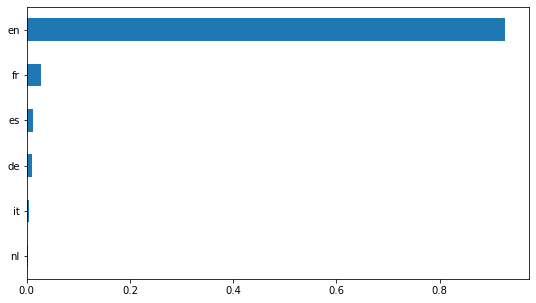

In [9]:
# visualizing the comments' languages a) quick and dirty
ax = df1.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

In [10]:
# splitting the dataframes in language related sub-dataframes
df1_eng = df1[(df1['language']=='en')]
df1_es  = df1[(df1['language']=='es')]
df1_fr  = df1[(df1['language']=='fr')]

In [11]:
text = " ".join(review for review in df1_eng.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5463237 words in the combination of all review.


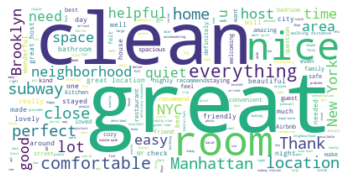

In [12]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["The", 'apartment','stay', "place", 'b', 'r', 'br'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
## load the SentimentIntensityAnalyser object in
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shubhammehra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# assign it to another name to make it easier to use

#VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is 
#sensitive to both polarity (positive/negative) and intensity (strength) of emotion. 
#It is available in the NLTK package and can be applied directly to unlabeled text data.

analyzer = SentimentIntensityAnalyzer()

In [15]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [16]:
print_sentiment_scores("This apartment is good.")

This apartment is good.----------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}


In [17]:
print_sentiment_scores("This apartment is good.")
print_sentiment_scores("This apartment is GOOD!")
print_sentiment_scores("This apartment is VERY GOOD!!")
print_sentiment_scores("This apartment is really GOOD! But the location is dreadful.")

This apartment is good.----------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
This apartment is GOOD!----------------- {'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6027}
This apartment is VERY GOOD!!----------- {'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.7386}
This apartment is really GOOD! But the location is dreadful. {'neg': 0.284, 'neu': 0.548, 'pos': 0.169, 'compound': -0.3977}


In [18]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [19]:
negative_score("The apartment is really GOOD! But the service is dreadful.")

0.284

In [20]:
neutral_score("The apartment is really GOOD! But the service is dreadful.")

0.548

In [21]:
positive_score("The apartment is really GOOD! But the service is dreadful.")

0.169

In [22]:
compound_score("The apartment is really GOOD! But the service is dreadful.")

-0.3977

In [23]:
%%time

df1_eng['sentiment_neg'] = df1_eng['review'].apply(negative_score)
df1_eng['sentiment_neu'] = df1_eng['review'].apply(neutral_score)
df1_eng['sentiment_pos'] = df1_eng['review'].apply(positive_score)
df1_eng['sentiment_compound'] = df1_eng['review'].apply(compound_score)

CPU times: user 29 s, sys: 41.7 ms, total: 29 s
Wall time: 29 s


In [25]:
# write the dataframe to a csv file in order to avoid the long runtime
df1_eng.to_csv('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/sentiment_df1_NEW1eng.csv', index=False)
df11 = pd.read_csv('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/sentiment_df1_NEW1eng.csv')

In [26]:
df1_eng.head(5)

,listing_id,url,review_posted_date,review,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very...",en,0.000,0.544,0.456,0.7713
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...,en,0.000,0.680,0.320,0.9549
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again,en,0.000,1.000,0.000,0.0000
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...,en,0.024,0.898,0.078,0.4580
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...,en,0.000,0.570,0.430,0.9062


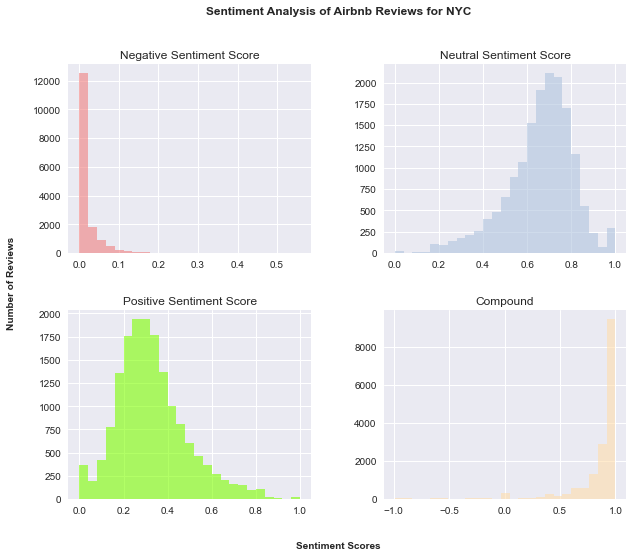

In [27]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df1_eng.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df1_eng.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df1_eng.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df1_eng.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for NYC\n\n', fontsize=12, fontweight='bold');

In [28]:
percentiles = df1_eng.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    16155.000000
mean         0.852538
std          0.245259
min         -0.990000
5%           0.419900
10%          0.635200
20%          0.807000
30%          0.877500
40%          0.915200
50%          0.939500
60%          0.955600
70%          0.968200
80%          0.977700
90%          0.986600
max          0.999100
Name: sentiment_compound, dtype: float64

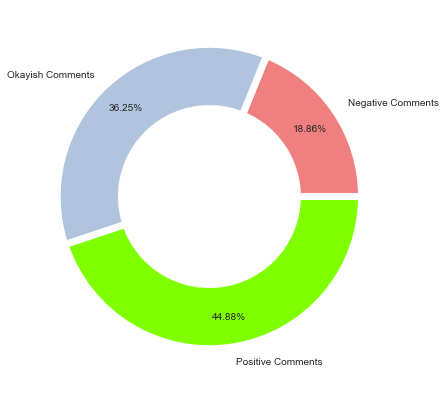

In [29]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [30]:
# full dataframe with POSITIVE comments
df1_pos = df1_eng.loc[df1_eng.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_reviews = df1_pos['review'].tolist()

In [31]:
# full dataframe with NEGATIVE comments
df1_neg = df1_eng.loc[df1_eng.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_reviews = df1_neg['review'].tolist()

In [32]:
df1_pos['text_length'] = df1_pos['review'].apply(len)
df1_neg['text_length'] = df1_neg['review'].apply(len)

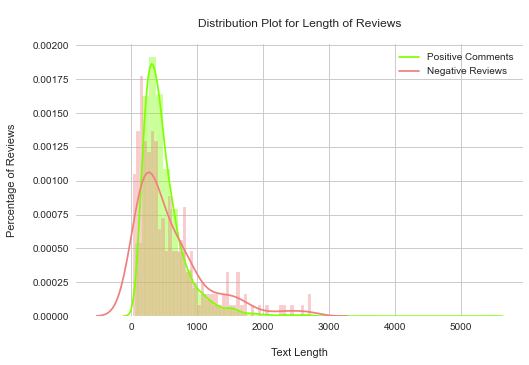

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df1_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df1_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Reviews\n')
plt.legend(['Positive Comments', 'Negative Reviews'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Reviews\n');
## Showing the trend for negative and positive reviews

In [35]:
# read some positive comments
pos_reviews[10:15]

["I'm glad I stayed here. I liked everything.\nThe apartment is quite spacious and comfortable with an extraordinary glass roof.\nA beautiful reflection of the Empire State Building can be seen in the window.\nExcellent location in the center of Manhattan, a few minutes walk to the excellent Bryant Park and to the Whole Foods Market.\nJeniffer is very friendly, on the last day when my flight was delayed she was not against my late check out. I appreciate it.",
 "Jennifer was without doubt an amazing host, she was incredibly kind and welcoming and made sure we had a great weekend. She supplied books and notes with all sorts of information about NY, the flat and the area. The flat is in the perfect location, not more than a 10 minute walk from Times Square and about the same distance from Penn station. The apartment itself is just as described, great for one or two people. I highly recommend the apartment and will surely use it again next time I'm in NY!",
 'This apartment is like a real

In [36]:
# read some negative comments
neg_reviews[15:20]

["Laurie's place is warm and charming, a lovely home. Laurie is not just the nicest person I met on my trip to New York, but one of the nicest people I've met. Period.",
 "To tell the truth - it was our worst stay ever!\n\nThe room's locate in the basement (that was not explained in Edward's descriprion and we were struck on coming there after arriving in NY).\nA dusty room of a closet size with a tiny window, through wich one can enjoy an unforgettable landscape of stinky trash cans. Don't believe the view of Manhattan in one of the pics in the room's description. It's fake.\n\nWe made a grave mistake when having booked the room for our entire NY vacation (2 weeks). We could hardly spend there a couple of days - in that stuffy room with bed sheets that seemed not to have been cleaned ever.\nThe last drop was when Masha got an allergy attack and became covered with rash (though no cases of such strengh had take place earlier).\n\nSe, we were forced to move ASAP.\n\nBUT!! Attention - we

In [37]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import nltk
nltk.download('stopwords')
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shubhammehra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

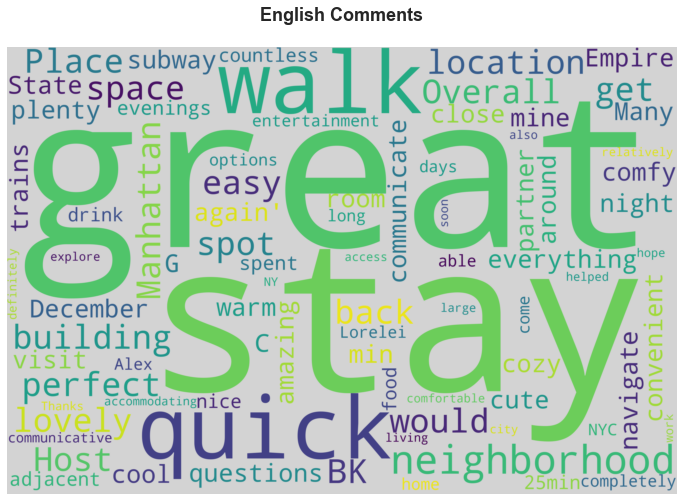

In [39]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df1_eng.review.values))

plot_wordcloud(wordcloud, 'English')

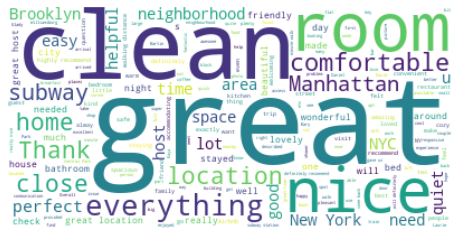

In [40]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["The", 'apartment','stay', "place", 'b', 'r', 'br', 'jullett', 'lirr'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

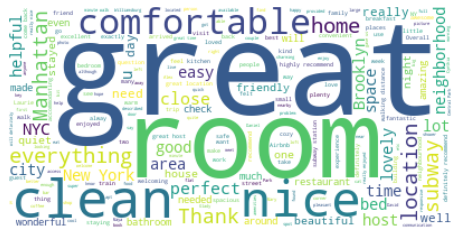

In [41]:

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["The", 'apartment','stay', "place", 'b', 'r', 'br'])
text1 = " ".join(review for review in df1_pos.review)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
### positively tuned comments 

In [42]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

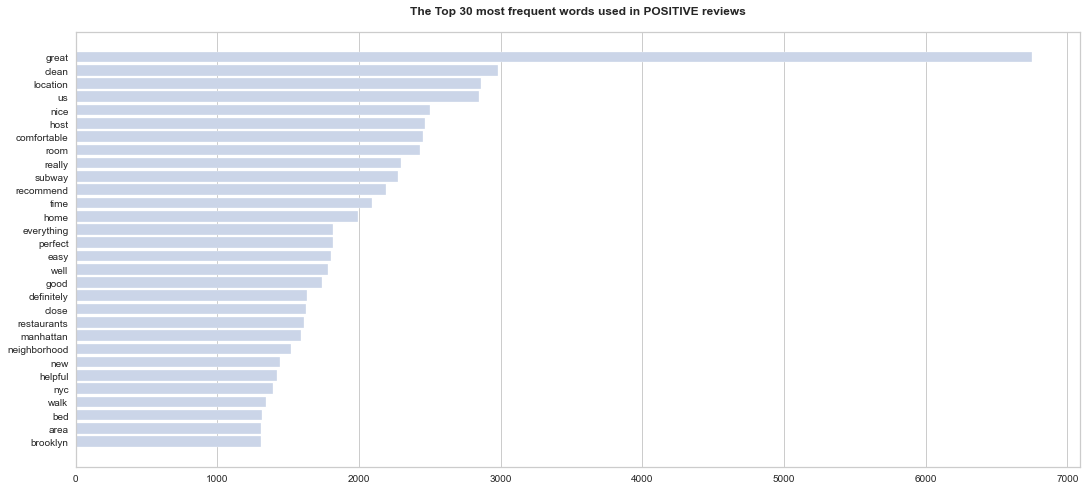

In [44]:
# vectorizing text
vectorizer = CountVectorizer(stop_words=stopwords)
docs = vectorizer.fit_transform(pos_reviews)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE reviews\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

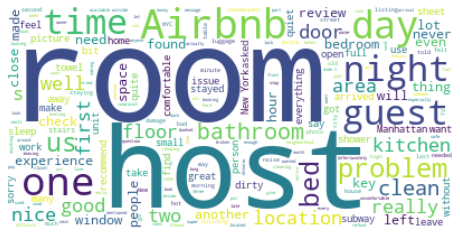

In [45]:

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["The", 'apartment','stay', "place", 'b', 'r', 'br'])
text1 = " ".join(review for review in df1_neg.review)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
### negatively tuned comments 

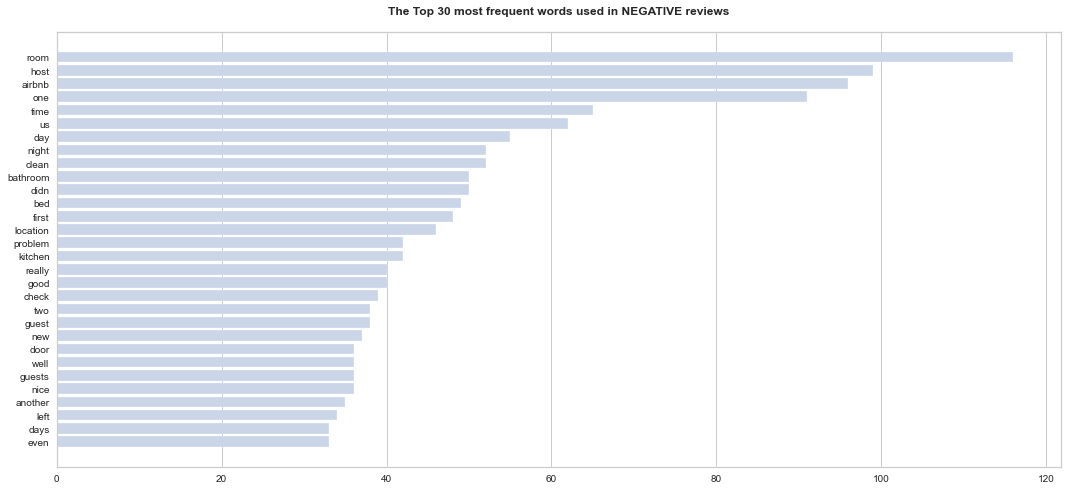

In [46]:
# vectorizing text
vectorizer = CountVectorizer(stop_words=stopwords)
docs = vectorizer.fit_transform(neg_reviews)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in NEGATIVE reviews\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

In [47]:
# importing libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [48]:
# prepare the preprocessing
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [49]:
# removing stopwords, punctuations and normalizing the corpus
import nltk
nltk.download('wordnet')
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(review).split() for review in pos_reviews]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shubhammehra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 

pickle.dump(corpus, open('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/corpus.pkl', 'wb'))
dictionary.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/dictionary.gensim')

In [51]:
import gensim

# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# uncomment the code if working locally
ldamodel.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model3.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.030*"great" + 0.022*"place" + 0.021*"stay" + 0.020*"apartment"')
(1, '0.012*"room" + 0.012*"u" + 0.011*"place" + 0.010*"home"')
(2, '0.013*"apartment" + 0.007*"night" + 0.007*"kitchen" + 0.007*"street"')


In [52]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# uncomment the code if working locally
ldamodel.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model5.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.021*"room" + 0.013*"bathroom" + 0.013*"bed" + 0.009*"bedroom"')
(1, '0.037*"great" + 0.026*"stay" + 0.025*"place" + 0.023*"apartment"')
(2, '0.031*"martin" + 0.020*"david" + 0.013*"home" + 0.012*"park"')
(3, '0.007*"alex" + 0.004*"jacqui" + 0.004*"wiebke" + 0.004*"pablo"')
(4, '0.017*"u" + 0.012*"place" + 0.012*"apartment" + 0.011*"time"')


In [53]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# uncomment the code if working locally
ldamodel.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model10.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.020*"place" + 0.019*"u" + 0.017*"stay" + 0.014*"home"')
(1, '0.063*"great" + 0.040*"stay" + 0.037*"place" + 0.029*"location"')
(2, '0.042*"mark" + 0.014*"al" + 0.010*"jonathan" + 0.008*"hit"')
(3, '0.044*"frederick" + 0.025*"julia" + 0.022*"stefan" + 0.018*"eric"')
(4, '0.032*"apartment" + 0.020*"subway" + 0.018*"walk" + 0.016*"great"')
(5, '0.027*"great" + 0.022*"restaurant" + 0.018*"really" + 0.018*"place"')
(6, '0.015*"room" + 0.011*"apartment" + 0.010*"bed" + 0.009*"place"')
(7, '0.045*"room" + 0.042*"mary" + 0.028*"ahmed" + 0.020*"dee"')
(8, '0.035*"alex" + 0.021*"really" + 0.021*"maya" + 0.018*"nice"')
(9, '0.055*"david" + 0.024*"rick" + 0.018*"olan" + 0.010*"gary"')


In [77]:
# calling the cleaning function we defined earlier
doc_clean = [clean(review).split() for review in neg_reviews]

In [78]:
# create a dictionary from the normalized data, convert this to a bag-of-words corpus
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]


In [79]:

pickle.dump(corpus, open('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/corpus_neg.pkl', 'wb'))
dictionary.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/dictionary_neg.gensim')

In [80]:
# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)


ldamodel.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model3_neg.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.006*"room" + 0.006*"apartment" + 0.006*"guest" + 0.006*"host"')
(1, '0.014*"place" + 0.011*"apartment" + 0.009*"room" + 0.008*"one"')
(2, '0.012*"apartment" + 0.011*"stay" + 0.008*"host" + 0.007*"day"')


In [81]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


ldamodel.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model5_neg.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"stay" + 0.007*"place" + 0.006*"host" + 0.006*"time"')
(1, '0.012*"room" + 0.011*"day" + 0.009*"guest" + 0.008*"place"')
(2, '0.015*"apartment" + 0.010*"place" + 0.008*"one" + 0.007*"stay"')
(3, '0.012*"host" + 0.012*"apartment" + 0.011*"place" + 0.011*"room"')
(4, '0.009*"room" + 0.008*"apartment" + 0.007*"place" + 0.007*"guest"')


In [82]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


ldamodel.save('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model10_neg.gensim')

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.011*"guest" + 0.009*"u" + 0.008*"time" + 0.008*"stay"')
(1, '0.008*"get" + 0.008*"place" + 0.008*"airbnb" + 0.007*"nice"')
(2, '0.015*"apartment" + 0.011*"host" + 0.011*"stay" + 0.009*"airbnb"')
(3, '0.011*"one" + 0.010*"host" + 0.010*"night" + 0.010*"apartment"')
(4, '0.015*"stay" + 0.012*"room" + 0.011*"apartment" + 0.011*"place"')
(5, '0.010*"room" + 0.009*"stay" + 0.008*"apartment" + 0.008*"host"')
(6, '0.010*"airbnb" + 0.009*"stay" + 0.006*"apartment" + 0.006*"close"')
(7, '0.019*"place" + 0.016*"apartment" + 0.014*"room" + 0.009*"stay"')
(8, '0.009*"one" + 0.007*"die" + 0.007*"und" + 0.007*"room"')
(9, '0.012*"apartment" + 0.009*"place" + 0.009*"guest" + 0.009*"day"')


In [83]:
dictionary = gensim.corpora.Dictionary.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/dictionary.gensim')
corpus = pickle.load(open('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/corpus.pkl', 'rb'))
import pyLDAvis.gensim_models


In [85]:
dictionary = gensim.corpora.Dictionary.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/dictionary_neg.gensim')
corpus = pickle.load(open('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/corpus_neg.pkl', 'rb'))
import pyLDAvis.gensim_models

In [61]:
# visualizing 3 positive topics
lda = gensim.models.ldamodel.LdaModel.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model3.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/

In [74]:
# visualizing 5 positive topics
lda = gensim.models.ldamodel.LdaModel.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model5.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shubhammehra/opt/anaconda3/lib/python3.9/

In [75]:
# visualizing 10 positive topics
lda = gensim.models.ldamodel.LdaModel.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model10.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [86]:
# visualizing 3 negative topics
lda = gensim.models.ldamodel.LdaModel.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model3_neg.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [76]:
# visualizing 5 negative topics
lda = gensim.models.ldamodel.LdaModel.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model5_neg.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

IndexError: index 3302 is out of bounds for axis 1 with size 3302

In [74]:
# visualizing 10 negative topics
lda = gensim.models.ldamodel.LdaModel.load('/Users/shubhammehra/Winter/Data Design Representation Jorn 422/Final Project_422/model10_neg.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/shubhammehra/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
